In [16]:
import geopandas as gpd
import pandas as pd

from sklearn import ensemble, metrics, model_selection, preprocessing

In [60]:
building_data = gpd.read_file("data/prg_building_locations.gpkg", engine="pyogrio")

In [61]:
building_data.head()

,cluster,floor_area_ratio,height,compactness,street_alignment,interbuilding_distance,block_perimeter_wall_length,NAZ_ZSJ,NAZ_KU,geometry
0,0,0.614375,23.458,0.747131,10.601522,37.185479,57.751467,U cementárny,Radotín,POINT (-749841.681 -1052279.951)
1,7,2.993299,16.099,0.469154,8.655982,8.547983,1033.921828,Horní malostranský obvod,Malá Strana,POINT (-744432.289 -1042699.409)
2,5,0.108374,3.673,0.498831,2.473966,26.135688,74.432812,Dolní Měcholupy-střed,Dolní Měcholupy,POINT (-733300.261 -1048136.856)
3,5,0.290723,9.097,0.627294,6.054875,32.423481,38.592030,Trojský obvod,Troja,POINT (-742468.177 -1039691.997)
4,3,0.017193,4.216,0.540439,0.134446,48.068409,49.125654,Vrch Svatého kříže,Žižkov,POINT (-740093.985 -1043857.813)


In [22]:
independent = building_data.drop(columns=["cluster", "geometry"])
independent[independent.columns] = preprocessing.robust_scale(independent)

In [24]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(independent, building_data["cluster"], test_size=.25)

In [25]:
model = ensemble.RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [26]:
pred = model.predict(X_test)

In [ ]:
proba = model.predict_proba(X_test)

In [28]:
metrics.accuracy_score(pred, y_test)

0.5270104620998318

In [51]:
metrics.cohen_kappa_score(pred, y_test)

0.44674807434710917

In [29]:
predicted  = model_selection.cross_val_predict(model, independent, building_data["cluster"], cv=4)

<Axes: >

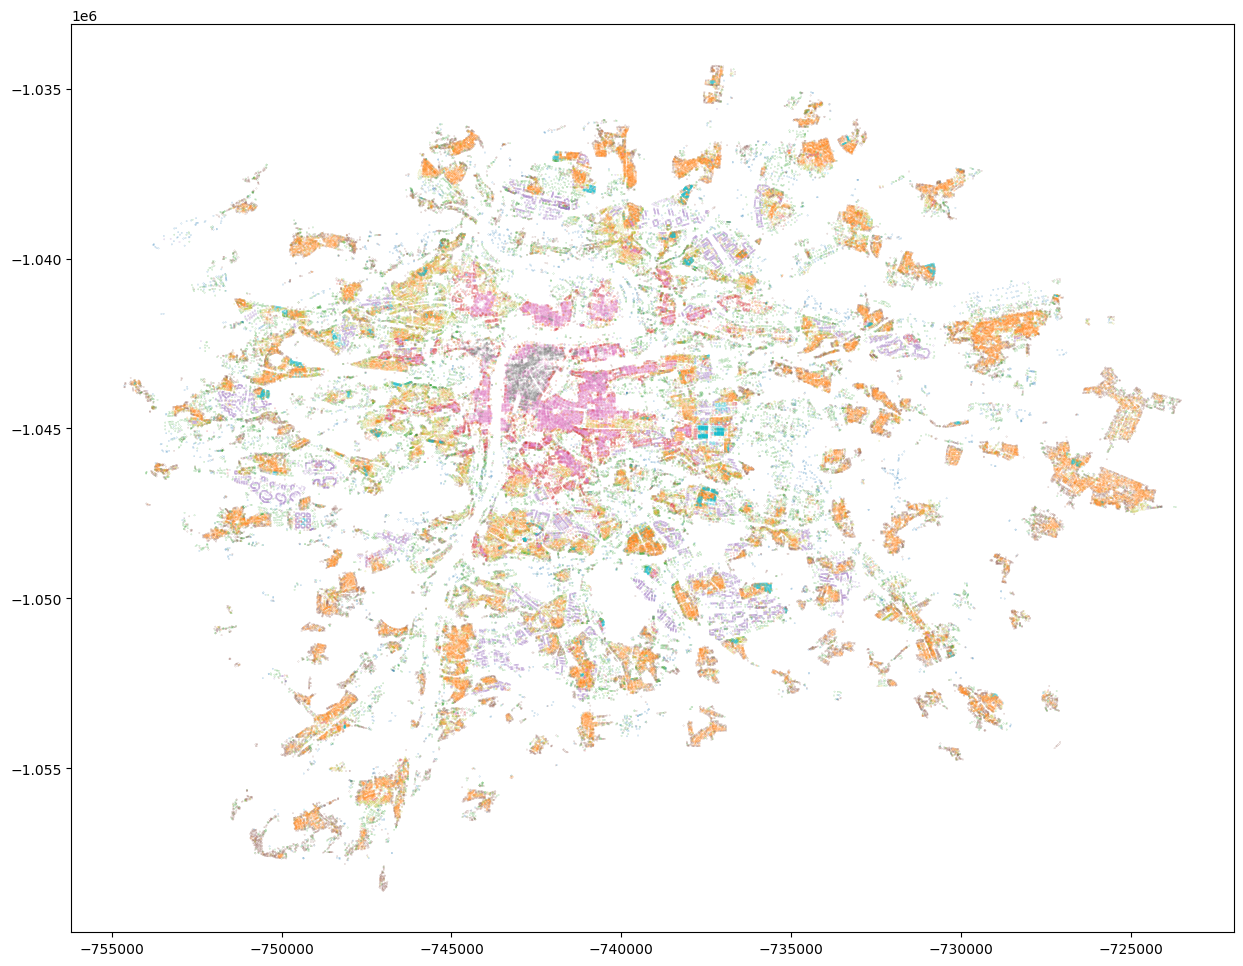

In [31]:
building_data.plot(predicted, categorical=True, figsize=(15, 15), markersize=.01)

In [54]:
cm = metrics.confusion_matrix(y_test, pred)
cm

array([[ 366,   23,  549,   15,   27,  301,    0,    1,   80,    4],
       [   1, 5233,   63,   28,    4,  988,   35,    0,  873,  132],
       [ 194,  260, 1681,  125,  165, 1017,    9,    2,  520,   30],
       [  17,  177,  172, 1036,  125,  193,  345,   16,  319,   34],
       [  30,   40,  356,   89, 1692,  200,    1,    0,  169,   25],
       [ 115, 1566,  521,    8,   17, 2845,    1,    0,  616,   49],
       [   0,  145,    6,  268,   10,   10, 1968,  123,   85,   27],
       [   0,   16,    7,   95,    1,   22,  159,  533,   22,    6],
       [  15, 1965,  425,  146,  172, 1058,   37,    1, 2014,  151],
       [   0,  498,   22,   54,   28,  103,   24,    1,  243, 1119]])

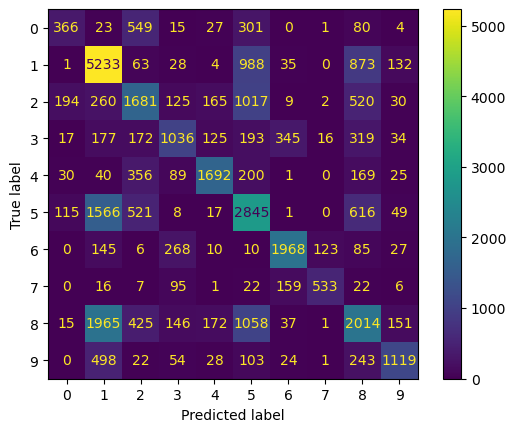

In [58]:
metrics.ConfusionMatrixDisplay(cm).plot()

Spatial cross-validation

In [63]:
building_data.NAZ_ZSJ.nunique()

887

In [64]:
building_data.NAZ_KU.nunique()

112

In [85]:
gkf = model_selection.StratifiedGroupKFold(n_splits=5)

In [86]:
d = []
for i, (train, test) in enumerate(gkf.split(building_data, building_data.cluster, groups=pd.factorize(building_data.NAZ_ZSJ)[0])):
    building_data.loc[test, "split"] = i


<Axes: >

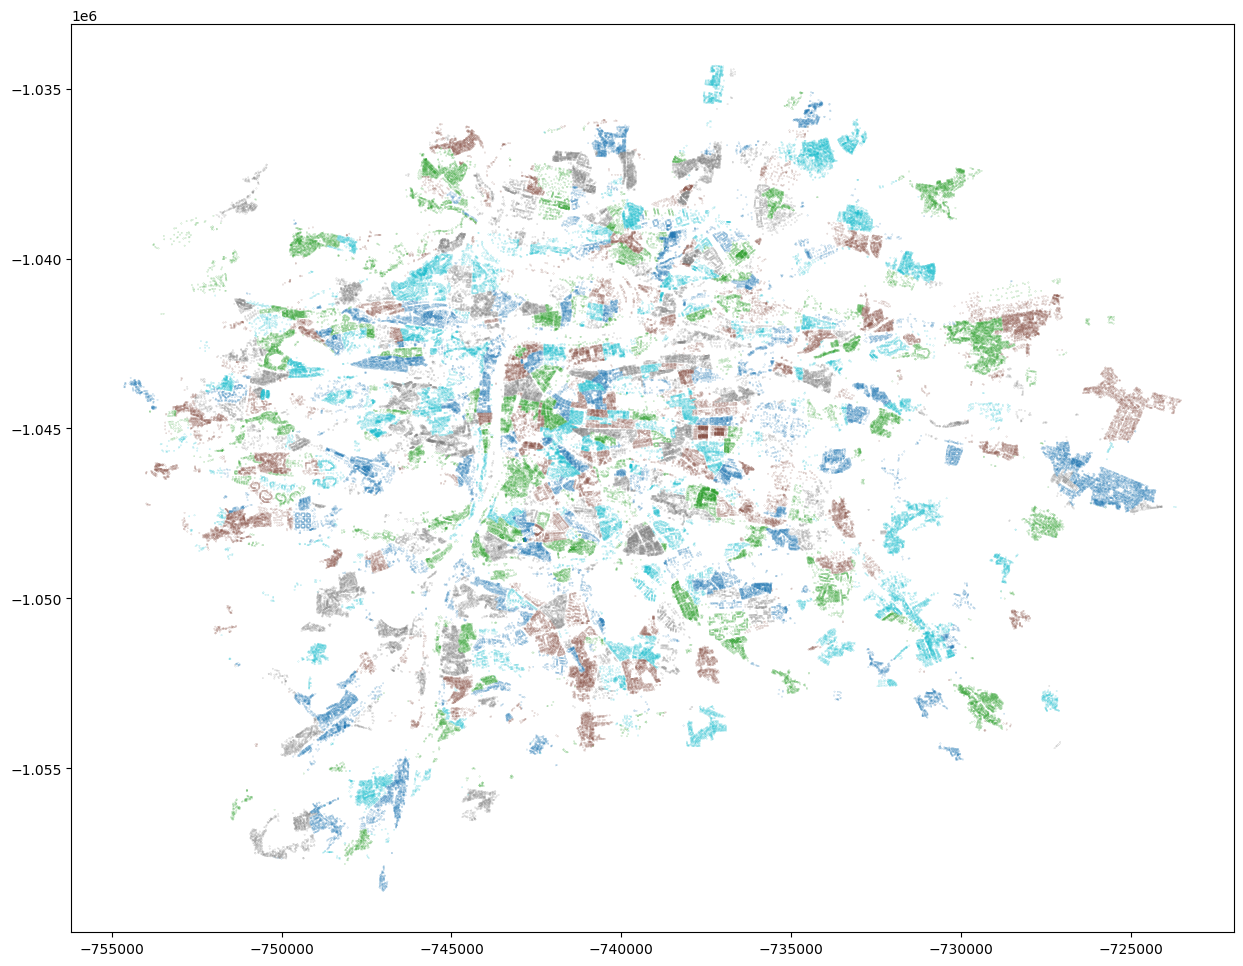

In [87]:
building_data.plot("split", categorical=True, figsize=(15, 15), markersize=.01)

In [88]:
train = building_data["split"] != 0
test = building_data["split"] == 0
X_train = independent.loc[train]
X_test = independent.loc[test]
y_train = building_data["cluster"].loc[train]
y_test = building_data["cluster"].loc[test]

In [89]:
model = ensemble.RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [90]:
pred = model.predict(X_test)

In [91]:
proba = model.predict_proba(X_test)

In [92]:
metrics.accuracy_score(pred, y_test)

0.4559122888468269

In [93]:
metrics.cohen_kappa_score(pred, y_test)

0.36167399241227804

In [94]:
predicted  = model_selection.cross_val_predict(model, independent, building_data["cluster"], cv=4)

<Axes: >

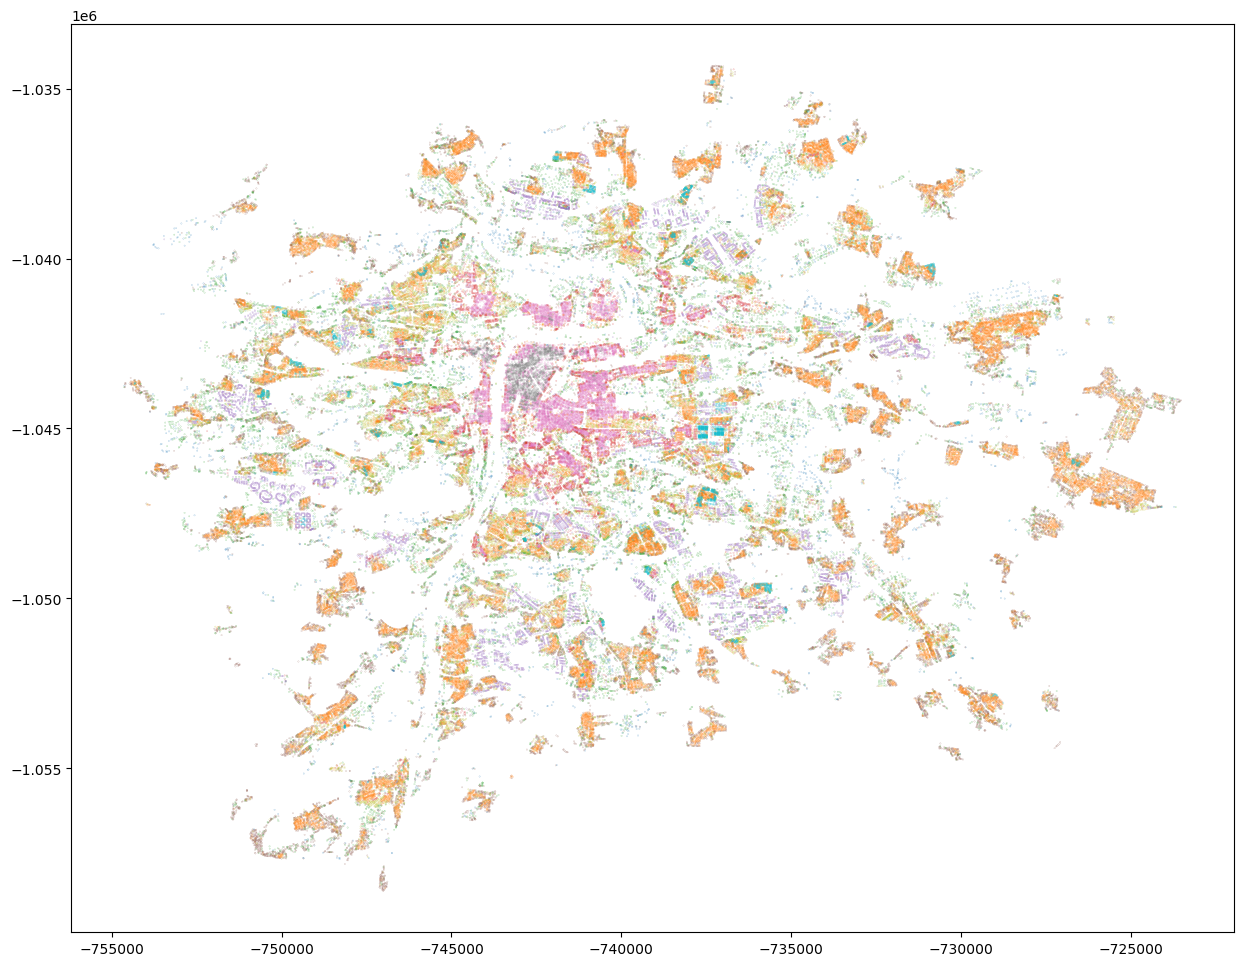

In [95]:
building_data.plot(predicted, categorical=True, figsize=(15, 15), markersize=.01)